### Import & basic exploration

In [ ]:
import pandas as pd

#pd.DataFrame('../chapter_2/Boston.csv')

data = pd.read_csv('../chapter_2/Boston.csv')

#data

        #rows:columns
#data[0:1]

#data[-3:-1]

data.head(3)

#data.tail(3)




,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7


In [27]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [28]:
data.shape

(506, 13)

In [29]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

### Visual epxloration

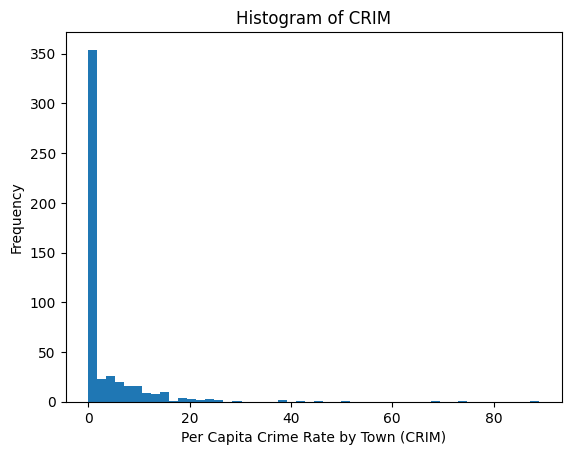

In [40]:
import matplotlib.pyplot as plt

crim_f = data["crim"]

#plot
fig, ax = plt.subplots()

ax.hist(crim_f, bins=50)

plt.xlabel('Per Capita Crime Rate by Town (CRIM)')
plt.ylabel('Frequency')
plt.title('Histogram of CRIM')

plt.show()

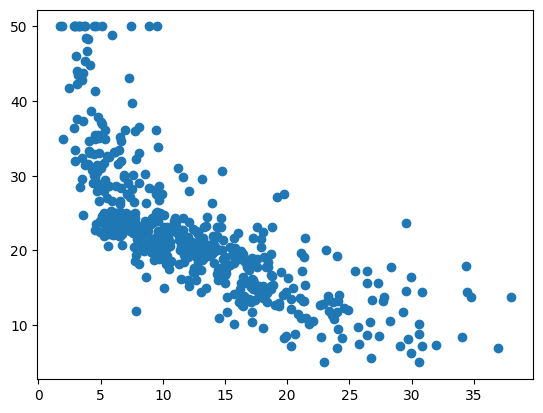

In [58]:
lower_stat_f = data["lstat"]
median_val_f = data["medv"]

fig, ax = plt.subplots()

ax.scatter(lower_stat_f, median_val_f)

## Linear Regresion of lstat and medv

In [68]:
from sklearn import model_selection

dataset = data[["lstat", "medv"]]

X = data[["lstat"]]
Y = data[["medv"]]

# x - lstat, y - medv
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state=42)



In [ ]:
from sklearn import linear_model
from sklearn import metrics

#X_train = X_train.reshape(-1, 1)
#Y_train = Y_train.reshape(-1, 1)

#training on training data
model = linear_model.LinearRegression().fit(X_train, Y_train)

#coeficcients
coef = model.coef_

coef

#intercept
interc = model.intercept_

interc

#result using predict() for X=10
#model_result = model.predict([[10]])

#prediciton for all test X
Y_prediction = model.predict(X_test)

#test on test data

#help(metrics.mean_sqaured_error)

mse = metrics.mean_squared_error(Y_test, Y_prediction)

#r^2

r2 = metrics.r2_score(Y_test, Y_prediction)

r2

print(f"r2: {r2}, mse: {mse}")


r2: 0.48869790079068554, mse: 38.09870218243468


## Multiple Linear Regression